# Processed 2D slice BTCV for Experiments

In [7]:
import os
import glob 
import numpy as np
import matplotlib.pyplot as plt
# from meseg.utils.etc import overlay

In [2]:
data_dir = "./data/segmentation/Synapse/train_npz/"
case_list = os.listdir(data_dir)
npzfile = np.load(os.path.join(data_dir, case_list[0]))
print(type(npzfile))

<class 'numpy.lib.npyio.NpzFile'>


In [3]:
## find label that include multi-organ
cnt = 0
for case in case_list[2:]:
    npzfile = np.load(os.path.join(data_dir, case))
    if (npzfile['label']>0).sum() > 0:
        break
    cnt+=1

In [22]:
import numpy as np
from typing import *
import cv2
from skimage import io, color
import matplotlib.pyplot as plt

def overlay(
    image: np.ndarray,
    mask: np.ndarray,
    # color: Tuple[int, int, int] = (255,0,0),
    alpha: float=0.5,
    resize: Tuple[int, int]=(512,512)
) -> np.ndarray:
    """
    Args:
        image (ndarray): image used as underlay for labels.
        mask (ndarray): integer array of labels with the same shape as image.
    return the image with segmentation masks 
    """
    if len(image.shape) == 2:   # gray color
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # if image.shape[-1] == min(image.shape):
    #     image = image.transpose(2,0,1)

    return color.label2rgb(label=mask, image=image, alpha=0.5, image_alpha=1.0, saturation=0.1)

(512, 512)
(512, 512)


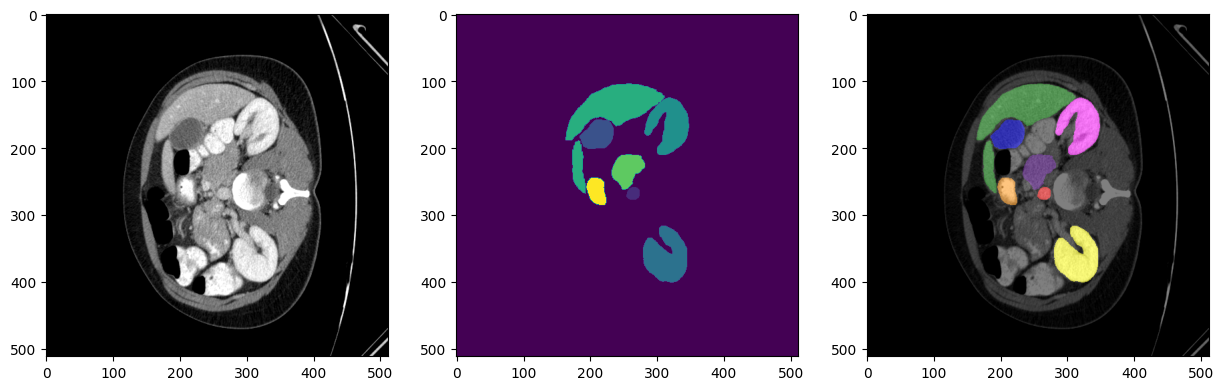

In [23]:
npzfile.files
print(npzfile['image'].shape)
print(npzfile['label'].shape)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
axes[0].imshow(npzfile['image'], cmap='gray')
axes[1].imshow(npzfile['label'])
axes[2].imshow(overlay(npzfile['image'], npzfile['label']))
# fig.
# plt.figure(figsize=(18,10))
# plt
# plt.show()
# plt
# plt.show()

# BTCV

In [28]:
import os

test_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/imagesTs"
train_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/imagesTr"
trainlabel_path = "/home/ljj0512/shared/hdd_ext/nvme1/medical/segmentation/BTCV/Abdomen/RawData/labelsTr"

test_dir = os.listdir(test_path)
print(len(test_dir))
train_dir = os.listdir(train_path)
print(len(train_dir))
trainlabel_dir = os.listdir(trainlabel_path)
print(len(trainlabel_dir))

20
30
30


In [62]:
# MRI 영상 등을 표현할 때 주자 쓰이는 NifTI 형식의 파일(.nii.gz)을 다룰 때에는 쓰이는 패키지
import nibabel as nib

idx = 1
print("train label:",trainlabel_dir[idx])
labelProxy = nib.load(os.path.join(trainlabel_path, trainlabel_dir[0]))
labelHeader = labelProxy.header

id = trainlabel_dir[idx].split("label")[-1]
for i in range(len(train_dir)):
    if train_dir[i].split("img")[-1].startswith(id):
        break

print("train:",train_dir[i])
trainProxy = nib.load(os.path.join(train_path, train_dir[i]))
trainHeader = trainProxy.header

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


train label: label0030.nii.gz
2023-01-04 12:00:27,186 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


train: img0030.nii.gz
2023-01-04 12:00:27,190 - pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [101]:
print(trainHeader)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 153   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7421875 0.7421875 3.        0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1464
glmin           : -1024
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.

In [102]:
labelarr = labelProxy.get_fdata()
print(type(labelarr))
print(labelarr.shape)
print("-"*50)

trainarr = trainProxy.get_fdata()
print(type(trainarr))
print(trainarr.shape)
# sub_arr = proxy.dataobj[..., 0:5]
# print(sub_arr.shape)

<class 'numpy.ndarray'>
(512, 512, 144)
--------------------------------------------------
<class 'numpy.ndarray'>
(512, 512, 153)


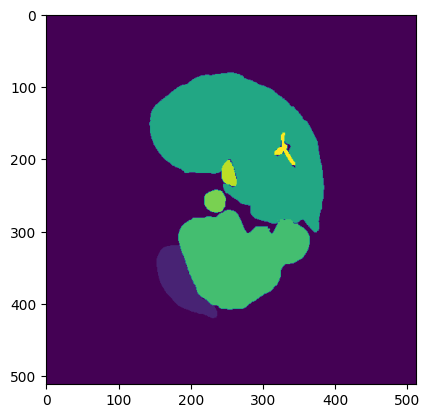

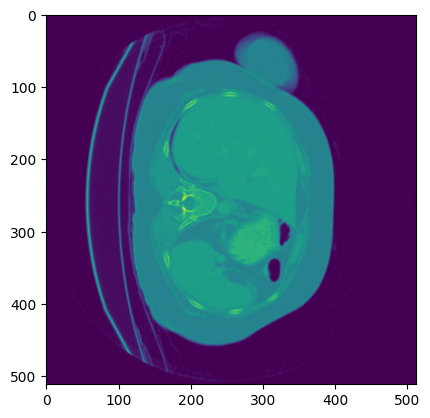

In [32]:
import matplotlib.pyplot as plt

idx = 120
plt.imshow(labelarr[..., idx])
plt.show()

idx = 75
plt.imshow(trainarr[..., idx])
plt.show()

/tmp/ipykernel_55580/2515560859.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


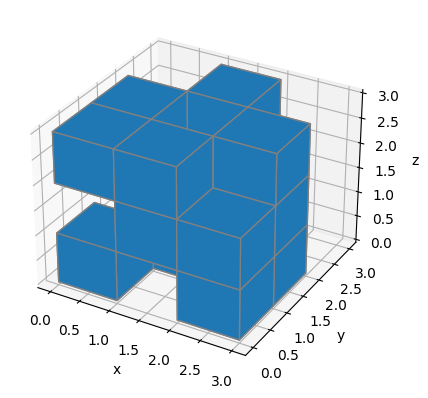

In [73]:
from mpl_toolkits.mplot3d import Axes3D
def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

filled = np.array([
    [[1, 0, 1], [0, 0, 1], [0, 1, 0]],
    [[0, 1, 1], [1, 0, 0], [1, 0, 1]],
    [[1, 1, 0], [1, 1, 1], [0, 0, 0]]
])

ax = make_ax(True)
ax.voxels(filled, edgecolors='gray', shade=False)
plt.show()

In [32]:
import matplotlib.pyplot as plt

new_idx = int((trainarr.shape[-1]/labelarr.shape[-1]) * idx)
print(new_idx)
temp_img = trainarr[..., new_idx]
plt.imshow(temp_img, cmap="gray")
plt.show()
print(temp_img.min())
print(temp_img.max())
print()

temp_img = temp_img-temp_img.min()
temp_img = np.round(temp_img*(255/temp_img.max())).astype(np.int32)
plt.imshow(temp_img, cmap="gray")
plt.show()
print(temp_img.min())
print(temp_img.max())
print()
# f, a = plt.subplots(1,trainarr.shape[-1])
# for i in range(trainarr.shape[-1]):
#     a[i].imshow(trainarr[...,i], cmap="gray")
#     a[i].set_title(f"{i+1}")

NameError: name 'trainarr' is not defined

# Processed 2D slice ACDC for Experiments

In [2]:
import os
import numpy as np
import nibabel as nb
import glob
import matplotlib.pyplot as plt
import cv2
import h5py
import random
from tqdm import tqdm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [19]:
random.randint(1,3)

1

In [32]:
root_dir = "./data/segmentation/ACDC/database/training/*/*"
files = glob.glob(root_dir)
# print(files)

images = []
labels = []
test_list = [random.randint(1,100) for _ in range(20)]
test_list = list(map(lambda x: str(x).zfill(3), test_list))
for each in files:
    if "frame" in each and "gt" in each:
        labels.append(each)
    elif "frame" in each:
        images.append(each)
# print(len(labels))
# print(labels)
# print(len(images))
# print(images)

# os.makedirs("./data/segmentation/ACDC/processed2D/processed/train_npz")
# os.makedirs("./data/segmentation/ACDC/processed2D/processed/test_npz")

os.makedirs('./data/segmentation/ACDC/processed2D/train_npz',exist_ok=True)
os.makedirs('./data/segmentation/ACDC/processed2D/test_npz',exist_ok=True)
os.makedirs('./data/segmentation/ACDC/processed2D/test_vol_h5',exist_ok=True)
# os.makedirs('./data/segmentation/ACDC/processed2D/',exist_ok=True)
prev_patient = "patient001"
slice_num = 0
train_file = open('./data/segmentation/ACDC/processed2D/train.txt','w')
test_file = open('./data/segmentation/ACDC/processed2D/test.txt','w')
test_h5_file = open('./data/segmentation/ACDC/processed2D/test_vol.txt','w')
for i in tqdm(range(len(images))):
    slice_num=0
    patient = images[i].split("/")[-2]
    image = nb.load(images[i]).get_fdata()
    label = nb.load(labels[i]).get_fdata()
    image = (image-image.min())/(image.max()-image.min())
    size = image.shape
    if size[0]>size[1]:
        pad_left = (size[0]-size[1])//2+(size[0]-size[1])%2
        pad_right = (size[0]-size[1])//2
        image = np.pad(image,((0,0),(pad_left,pad_right),(0,0)),'constant')
        label = np.pad(label,((0,0),(pad_left,pad_right),(0,0)),'constant')
    elif size[0]<size[1]:
        pad_up = (size[1]-size[0])//2+(size[1]-size[0])%2
        pad_down = (size[1]-size[0])//2
        image = np.pad(image,((pad_up,pad_down),(0,0),(0,0)),'constant')
        label = np.pad(label,((pad_up,pad_down),(0,0),(0,0)),'constant')
        
    assert image.shape[0]==image.shape[1],'padding failed'
    assert image.shape[2]==label.shape[2],f'{image.shape[2],label.shape[2],images[i],labels[i]}'
    slices = image.shape[2]
    if i!=0 and prev_patient == patient:
        slice_num = slice_num +slices
    if patient[-3:] not in test_list:
        for num in range(slices):
            case_image = cv2.resize(image[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            case_label = cv2.resize(label[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            np.savez("./data/segmentation/ACDC/processed2D/train_npz/" + str(patient) + "_slice" + str(slice_num).zfill(3),image = case_image, label=case_label)
            train_file.write(str(patient) + "_slice" + str(slice_num).zfill(3)+'.npz'+'\n')
            slice_num+=1
    else:
        image_h5, label_h5 = np.zeros((slices, 224, 224)), np.zeros((slices, 224, 224))
        for num in range(slices):
            case_image = cv2.resize(image[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            case_label = cv2.resize(label[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            image_h5[num], label_h5[num] = case_image, case_label
            np.savez("./data/segmentation/ACDC/processed2D/test_npz/" + str(patient) + "_slice" + str(slice_num).zfill(3),image = case_image, label=case_label)
            test_file.write(str(patient) + "_slice" + str(slice_num).zfill(3)+'.npz'+'\n')
            slice_num+=1
        with h5py.File(f"./data/segmentation/ACDC/processed2D/test_vol_h5/{patient}.npy.h5", 'w') as f:
            f.create_dataset('image', data=image_h5)
            f.create_dataset('label', data=label_h5)
        test_h5_file.write(f'{patient}.npy.h5'+'\n')
            
    prev_patient = patient
train_file.close()
test_file.close()
test_h5_file.close()

100%|██████████| 200/200 [00:06<00:00, 31.54it/s]


In [36]:
import numpy as np
from glob import glob

root_dir = "./data/segmentation/ACDC/processed2D/train_npz"
data_list = glob(os.path.join(root_dir,"*"))
# print(data_list)
file = np.load(data_list[0])
print(file['image'].shape)
print(file['label'].shape)

(224, 224)
(224, 224)


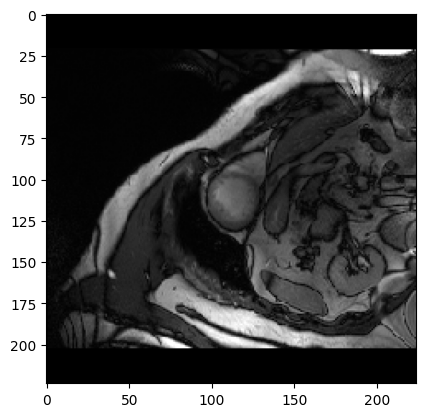

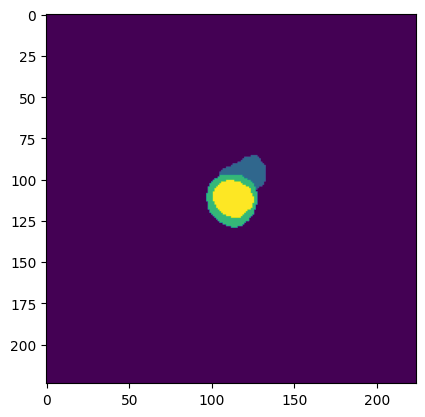

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [40]:
from meseg.utils.etc import overlay
plt.imshow(file['image'], cmap='gray')
plt.show()
plt.imshow(file['label'])
plt.show()
overlay(image=file['image'], mask=file['label'])